In [1]:
from PIL import Image
import cv2
import numpy as np
import zipfile

In [2]:
# path = 'required/Datasets/yalefaces.zip'
# zip_object = zipfile.ZipFile(file=path, mode='r')
# zip_object.extractall('./')
# zip_object.close()

In [3]:
import os

def get_image_data():
    paths = [ os.path.join('yalefaces/train', f) for f in os.listdir('yalefaces/train') ]
    faces = []
    ids = []
    for path in paths:
        image = Image.open(path).convert('L')
        image_np = np.array(image, 'uint8')
        id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
        ids.append(id)
        faces.append(image_np)
        
    return np.array(ids), faces

ids, faces = get_image_data()

In [4]:
# lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
# lbph_classifier.train(faces, ids)
# lbph_classifier.write('lbph_classifier.yml')

In [5]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('lbph_classifier.yml')

In [6]:
test_image = 'yalefaces/test/subject10.sad.gif'

image = Image.open(test_image).convert('L')
image_np = np.array(image, 'uint8')

prediction = lbph_face_classifier.predict(image_np)
prediction

(10, 6.384336446373091)

In [7]:
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject', ''))
expected_output

10

In [8]:
cv2.putText(image_np, 'Pred: ' + str(prediction[0]), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2.putText(image_np, 'Exp: ' + str(prediction[0]), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2.imshow("Image", image_np)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
paths = [os.path.join('yalefaces/test', f) for f in os.listdir('yalefaces/test')]
predictions = []
expected_outputs = []
for path in paths:
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject', '')) 

  predictions.append(prediction)
  expected_outputs.append(expected_output)

In [10]:
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [11]:
predictions

array([ 1,  1,  4,  5,  3,  9,  9,  4,  5,  5,  6, 14,  7,  9,  8,  4,  7,
        9,  4, 10, 11, 11, 12, 12, 13, 13, 14, 14,  7, 15])

In [12]:
expected_outputs

array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
        9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15])

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs, predictions)

0.6666666666666666

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_outputs, predictions)
cm

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

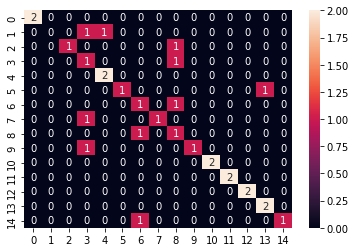

In [15]:
import seaborn
seaborn.heatmap(cm, annot=True);

In [16]:
import dlib
import cv2

In [17]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('required/Weights/shape_predictor_68_face_landmarks.dat')

In [19]:
image = cv2.imread('required/Images/people2.jpg')
face_detection = face_detector(image, 1)
for face in face_detection:
  points = points_detector(image, face)
  for point in points.parts():
    cv2.circle(image, (point.x, point.y), 2, (0,255,0), 1)

  #print(points.parts())
  #print(len(points.parts()))

  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image, (l, t), (r, b), (0,255,255), 2)
# cv2.imshow(image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [20]:
import os

In [21]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('required/Weights/shape_predictor_68_face_landmarks.dat')
face_descriptor_extractor = dlib.face_recognition_model_v1('required/Weights/dlib_face_recognition_resnet_model_v1.dat')

In [23]:
index = {}
idx = 0
face_descriptors = None

paths = [os.path.join('yalefaces/train', f) for f in os.listdir('yalefaces/train')]
for path in paths:
  image = Image.open(path).convert('RGB')
  image_np = np.array(image, 'uint8')
  face_detection = face_detector(image_np, 1)
  for face in face_detection:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(image_np, (l, t), (r, b), (0, 0, 255), 2)

    points = points_detector(image_np, face)
    for point in points.parts():
      cv2.circle(image_np, (point.x, point.y), 2, (0, 255, 0), 1)

    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
    face_descriptor = [f for f in face_descriptor]
    face_descriptor = np.asarray(face_descriptor, dtype=np.float64)
    face_descriptor = face_descriptor[np.newaxis, :]

    if face_descriptors is None:
      face_descriptors = face_descriptor
    else:
      face_descriptors = np.concatenate((face_descriptors, face_descriptor), axis = 0)

    index[idx] = path
    idx += 1
  #cv2_imshow(image_np)

In [24]:
face_descriptors.shape

(132, 128)

In [25]:
index

{0: 'yalefaces/train\\subject01.glasses.gif',
 1: 'yalefaces/train\\subject01.leftlight.gif',
 2: 'yalefaces/train\\subject01.noglasses.gif',
 3: 'yalefaces/train\\subject01.normal.gif',
 4: 'yalefaces/train\\subject01.sad.gif',
 5: 'yalefaces/train\\subject01.sleepy.gif',
 6: 'yalefaces/train\\subject01.surprised.gif',
 7: 'yalefaces/train\\subject01.wink.gif',
 8: 'yalefaces/train\\subject02.glasses.gif',
 9: 'yalefaces/train\\subject02.happy.gif',
 10: 'yalefaces/train\\subject02.noglasses.gif',
 11: 'yalefaces/train\\subject02.normal.gif',
 12: 'yalefaces/train\\subject02.rightlight.gif',
 13: 'yalefaces/train\\subject02.sad.gif',
 14: 'yalefaces/train\\subject02.sleepy.gif',
 15: 'yalefaces/train\\subject02.surprised.gif',
 16: 'yalefaces/train\\subject02.wink.gif',
 17: 'yalefaces/train\\subject03.centerlight.gif',
 18: 'yalefaces/train\\subject03.happy.gif',
 19: 'yalefaces/train\\subject03.noglasses.gif',
 20: 'yalefaces/train\\subject03.normal.gif',
 21: 'yalefaces/train\\subj

In [26]:
np.linalg.norm(face_descriptors[131] - face_descriptors[130])

0.45545772058204587

In [27]:
np.linalg.norm(face_descriptors[131] - face_descriptors[129])

0.3592425475586557

In [28]:
np.linalg.norm(face_descriptors[131] - face_descriptors[128])

0.3897631465814472

In [29]:
np.linalg.norm(face_descriptors[0] - face_descriptors, axis = 1)

array([0.        , 0.50784066, 0.42630828, 0.42523886, 0.49062287,
       0.51342067, 0.53196639, 0.56026292, 0.64546154, 0.71203305,
       0.64394343, 0.64394343, 0.6279177 , 0.65121567, 0.65244522,
       0.66494466, 0.69290892, 0.78224738, 0.7572715 , 0.75894476,
       0.75894476, 0.78576578, 0.73202454, 0.75590369, 0.73413247,
       0.713863  , 0.89752284, 0.79584049, 0.82464709, 0.84394898,
       0.83921448, 0.85722717, 0.83921448, 0.86529412, 0.82774315,
       0.69236218, 0.74783535, 0.71776441, 0.7009174 , 0.72964894,
       0.75288691, 0.71601198, 0.7287896 , 0.76001713, 0.71714441,
       0.7976271 , 0.7976271 , 0.83201444, 0.76261227, 0.76996188,
       0.77587483, 0.77188033, 0.84889167, 0.74429965, 0.86814441,
       0.86814441, 0.86762203, 0.84179276, 0.84827418, 0.82435086,
       0.77751376, 0.78690973, 0.78265545, 0.75007827, 0.79965428,
       0.88586834, 0.79735256, 0.82817122, 0.71264815, 0.76670965,
       0.73047903, 0.67167058, 0.7529004 , 0.76069186, 0.72093

In [30]:
np.argmin(np.linalg.norm(face_descriptors[0] - face_descriptors[1:], axis = 1))

2

In [31]:
threshold = 0.5
predictions = []
expected_outputs = []

paths = [os.path.join('yalefaces/test', f) for f in os.listdir('yalefaces/test')]
for path in paths:
  image = Image.open(path).convert('RGB')
  image_np = np.array(image, 'uint8')
  face_detection = face_detector(image_np, 1)
  for face in face_detection:
    points = points_detector(image_np, face)
    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
    face_descriptor = [f for f in face_descriptor]
    face_descriptor = np.asarray(face_descriptor, dtype=np.float64)
    face_descriptor = face_descriptor[np.newaxis, :]

    distances = np.linalg.norm(face_descriptor - face_descriptors, axis = 1)
    min_index = np.argmin(distances)
    min_distance = distances[min_index]
    if min_distance <= threshold:
      name_pred = int(os.path.split(index[min_index])[1].split('.')[0].replace('subject', ''))
    else:
      name_pred = 'Not identified'

    name_real = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

    predictions.append(name_pred)
    expected_outputs.append(name_real)

    cv2.putText(image_np, 'Pred: ' + str(name_pred), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
    cv2.putText(image_np, 'Exp : ' + str(name_real), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))


#   cv2_imshow(image_np)

predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [32]:
predictions

array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
        9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15])

In [33]:
expected_outputs

array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
        9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15])

In [34]:
accuracy_score(expected_outputs, predictions)

1.0